In [2]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import simpledialog
from tkinter import filedialog
from tkinter import *

H:/Other computers/My Laptop/PhD-Zipeng/2023_off cycle/Pharo Quant Risk Intern/Testing data.csv
X =  10
Y =  110
Z =  10


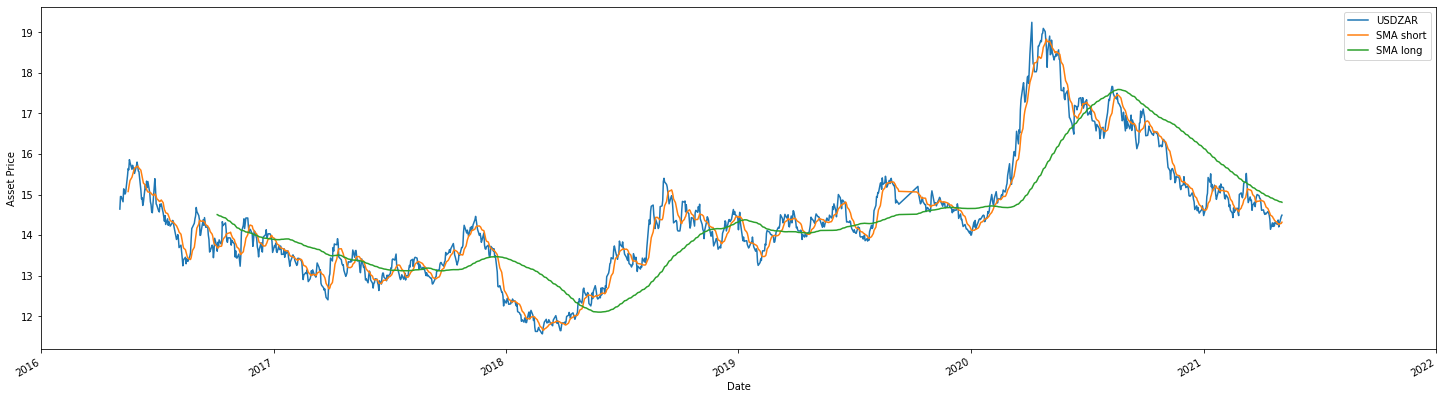

,USDZAR,SMA short,SMA long,Spread (short-long),Indicator
Date,,,,,
2016-05-04,14.64,NaN,NaN,NaN,0
2016-05-05,14.95,NaN,NaN,NaN,0
2016-05-06,14.95,NaN,NaN,NaN,0
2016-05-09,14.82,NaN,NaN,NaN,0
2016-05-10,15.14,NaN,NaN,NaN,0
...,...,...,...,...,...
2021-04-28,14.37,14.277,14.840636,-0.563636,0
2021-04-29,14.20,14.258,14.832273,-0.574273,0
2021-04-30,14.28,14.272,14.823818,-0.551818,0


In [3]:
# Data initiation and input X,Y,Z
ROOT = tk.Tk()
ROOT.withdraw()
path = filedialog.askopenfilename(title="file path")
print(path)

ROOT = tk.Tk()
ROOT.withdraw()
X = simpledialog.askstring(title="X", prompt="Fast MA, X = :")
print("X = ", X)
X = int(X)

ROOT = tk.Tk()
ROOT.withdraw()
Y = simpledialog.askstring(title="Y", prompt="Slow MA, Y = :")
print("Y = ", Y)
Y = int(Y)

ROOT = tk.Tk()
ROOT.withdraw()
Z = simpledialog.askstring(title="Z", prompt="Transcation Cost, Z = :")
print("Z = ", Z)
Z = int(Z)


def Setup(X, Y, filepath):
    price_data = pd.read_csv(path, index_col='Date', parse_dates=True)
    sma_short =  price_data.rolling(X).mean()
    sma_long =  price_data.rolling(Y).mean()
    spread = sma_short-sma_long
    price_data.insert(len(price_data.columns), "SMA short", sma_short)
    price_data.insert(len(price_data.columns), "SMA long", sma_long)
    price_data.insert(len(price_data.columns), "Spread (short-long)", spread)

    indicator =[]
    for i in range(len(price_data)):
        if price_data['Spread (short-long)'].iloc[i] >0 and price_data['Spread (short-long)'].iloc[i-1] <0 :
            indi = 1
        elif price_data['Spread (short-long)'].iloc[i] <0 and price_data['Spread (short-long)'].iloc[i-1] >0:
            indi = -1
        else:
            indi = 0
        indicator.append(indi)

    price_data.insert(len(price_data.columns), "Indicator", indicator)

    price_data.head(Y)
    plt.figure(figsize=(25, 7))
    price_data['USDZAR'].plot()
    price_data['SMA short'].plot()
    price_data['SMA long'].plot()
    plt.legend()
    plt.ylabel('Asset Price')
    plt.xlim(datetime.date(2016,1,1),datetime.date(2022,1,1))
    
    plt.show()

    return price_data

Setup(X, Y, path)

Start from  2020-01-01
End at  2021-05-01


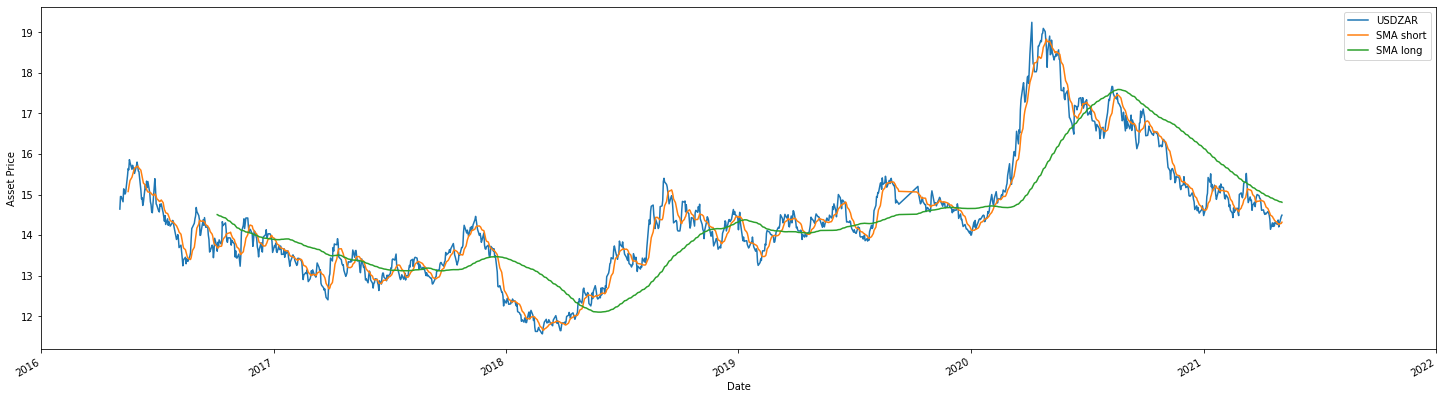

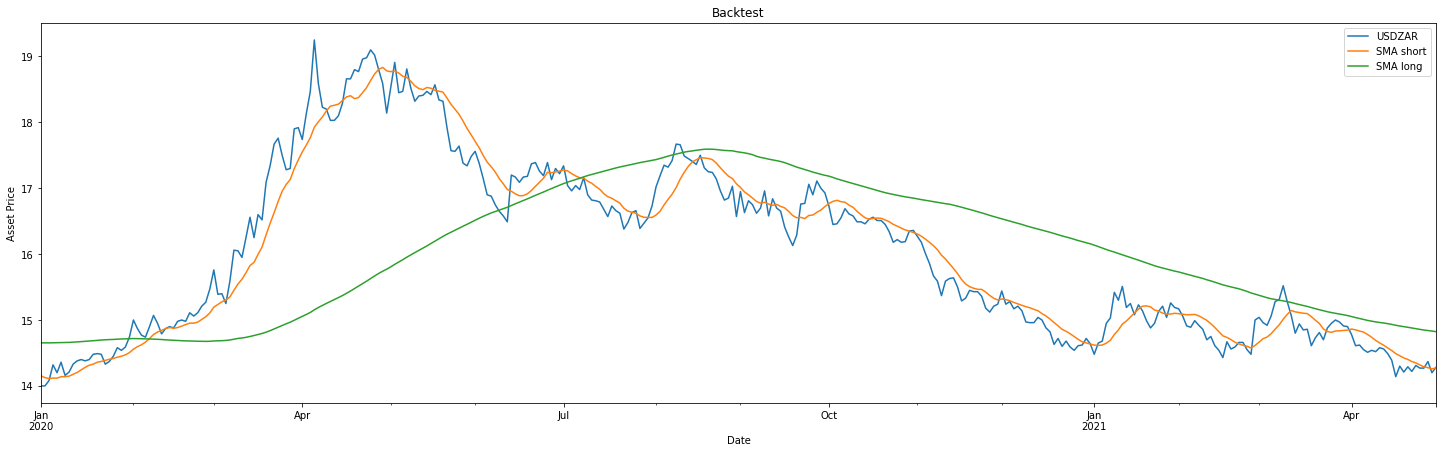

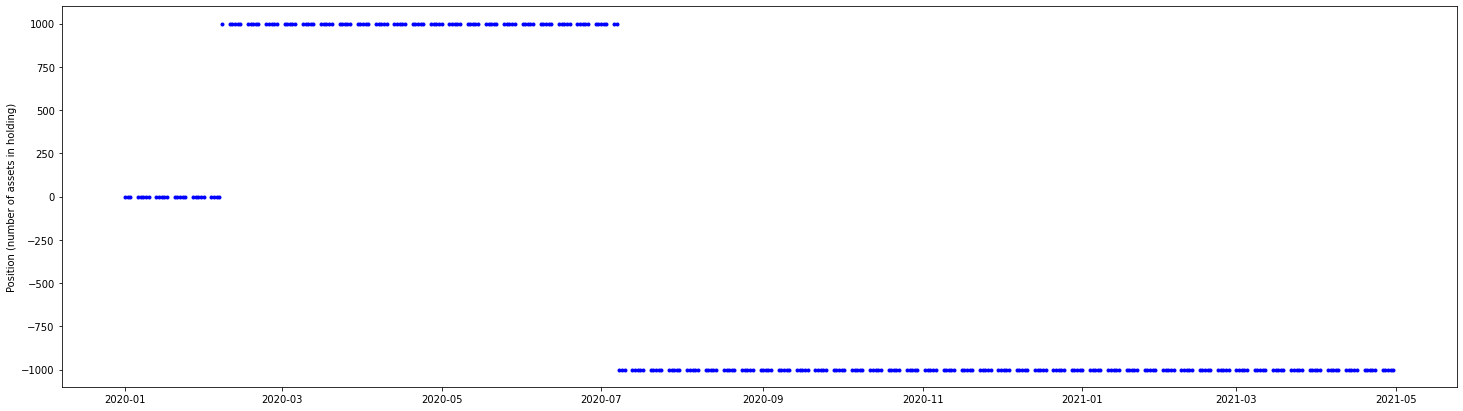

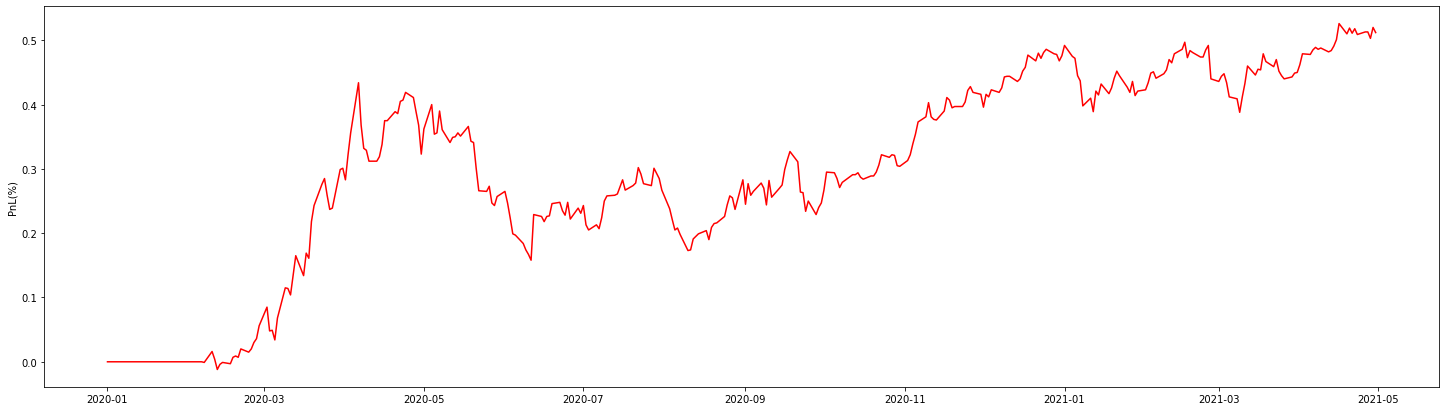

In [4]:
#=============================Set date range for backtesting=========================================

ROOT = tk.Tk()
ROOT.withdraw()
start = simpledialog.askstring(title="Start Date", prompt="after 2016-05-04")
print("Start from ", start)

ROOT = tk.Tk()
ROOT.withdraw()
end = simpledialog.askstring(title="End Date", prompt="before 2021-05-04")
print("End at ", end)

#============================ Backtest the MA Crossover Strategy=======================================
def Backtest(start, end, Z):
    price_data = Setup(X, Y, path)
    price_data = price_data.loc[start:end]
    position_lst = []
    position = 0
    transaction_lst = []
    transcation = 0
    cash_lst =[]
    cash = 1000000
    balance_lst = []
    balance = cash

    i = 0 
    for row in price_data['Indicator']:
        if row== 0:
            position = position
            position_lst.append(position)
            transcation = position - position_lst[i-1]
            transaction_lst.append(transcation)
            cash = cash
            balance = cash + position*price_data.iloc[:,0][i]
            cash_lst.append(cash)
            balance_lst.append(balance)
            i = i+1
        elif row == 1 or row == -1:
            position = 1000 *row
            position_lst.append(position)
            transcation = position - position_lst[i-1]
            transaction_lst.append(transcation)
            cash = cash - transcation*price_data.iloc[:,0][i]-Z
            balance = cash + position*price_data.iloc[:,0][i]
            cash_lst.append(cash)
            balance_lst.append(balance)
            i = i+1


    price_data.insert(len(price_data.columns), "Position", position_lst)
    price_data.insert(len(price_data.columns), "Transcation", transaction_lst)
    price_data.insert(len(price_data.columns), "Cash", cash_lst)
    price_data.insert(len(price_data.columns), "Balance", balance_lst)

    #================================================Performance Visualization============================================================

    plt.figure(figsize=(25, 7))
    price_data['USDZAR'].plot()
    price_data['SMA short'].plot()
    price_data['SMA long'].plot()
    plt.legend()
    plt.ylabel('Asset Price')
    plt.title('Backtest')
    plt.show()
    plt.figure(figsize=(25, 7))
    plt.plot(price_data['Position'],'b.')
    plt.ylabel('Position (number of assets in holding)')
    plt.figure(figsize=(25, 7))
    plt.plot((0.000001*price_data['Balance']-1)*100, 'r')
    plt.ylabel('PnL(%)')

    # return price_data, 'Performance plots'




Backtest(start,end, Z)
